# Mushroom Classification

Is there any relationship between the appearance of a type of mushroom, and it is edible or not?

The notebook will use dastset from [Kaggle](https://www.kaggle.com/datasets/uciml/mushroom-classification) to explore this topic, and using both supervised and unsupervised algorithm to explore this dataset.

In [35]:
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

RawDataPath = pathlib.Path("./.data/mushrooms.csv")

np.random.seed(422)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

df = pd.read_csv(RawDataPath)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Dataset Info

Just by looking at the dataset, it is obvious that the each column in the dataset is catagorical. 
This is very interesting to see different type machine learning method works on this highly catagorical dataset.

#### Dataset Description from Kaggle

|Column|Possible Value and Meaning|
|-|-|
|cap-shape| bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s|
|cap-surface| fibrous=f,grooves=g,scaly=y,smooth=s|
|cap-color| brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y|
|bruises| bruises=t,no=f|
|odor| almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s|
|gill-attachment| attached=a,descending=d,free=f,notched=n|
|gill-spacing| close=c,crowded=w,distant=d|
|gill-size| broad=b,narrow=n|
|gill-color| black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y|
|stalk-shape| enlarging=e,tapering=t|
|stalk-root| bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?|
|stalk-surface-above-ring| fibrous=f,scaly=y,silky=k,smooth=s|
|stalk-surface-below-ring| fibrous=f,scaly=y,silky=k,smooth=s|
|stalk-color-above-ring| brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y|
|stalk-color-below-ring| brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y|
|veil-type| partial=p,universal=u|
|veil-color| brown=n,orange=o,white=w,yellow=y|
|ring-number| none=n,one=o,two=t|
|ring-type| cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z|
|spore-print-color| black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y|
|population| abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y|
|habitat| grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d|


#### Exploratory Data Analysis (EDA)

- Distribution of each column?
- Can some of them converted to numeric one?
- Convert to Categorical Columns to one hot encoding, and name them properly, instead of one character representation.
- Correlation Analysis on the features.

In [8]:
def map_char_2_name(df: pd.DataFrame) -> pd.DataFrame:
    char2Name = {
        "cap-shape": {"b":"bell","c":"conical","x":"convex","f":"flat", "k":"knobbed","s":"sunken"},
        "cap-surface": {"f":"fibrous","g":"grooves","y":"scaly","s":"smooth"},
        "cap-color": {"n":"brown","b":"buff","c":"cinnamon","g":"gray","r":"green","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"},
        "bruises": {"t":"bruises","f":"no"},
        "odor": {"a":"almond","l":"anise","c":"creosote","y":"fishy","f":"foul","m":"musty","n":"none","p":"pungent","s":"spicy"},
        "gill-attachment": {"a":"attached","d":"descending","f":"free","n":"notched"},
        "gill-spacing": {"c":"close","w":"crowded","d":"distant"},
        "gill-size": {"b":"broad","n":"narrow"},
        "gill-color": {"k":"black","n":"brown","b":"buff","h":"chocolate","g":"gray", "r":"green","o":"orange","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"},
        "stalk-shape": {"e":"enlarging","t":"tapering"},
        "stalk-root": {"b":"bulbous","c":"club","u":"cup","e":"equal","z":"rhizomorphs","r":"rooted","?":"missing"},
        "stalk-surface-above-ring": {"f":"fibrous","y":"scaly","k":"silky","s":"smooth"},
        "stalk-surface-below-ring": {"f":"fibrous","y":"scaly","k":"silky","s":"smooth"},
        "stalk-color-above-ring": {"n":"brown","b":"buff","c":"cinnamon","g":"gray","o":"orange","p":"pink","e":"red","w":"white","y":"yellow"},
        "stalk-color-below-ring": {"n":"brown","b":"buff","c":"cinnamon","g":"gray","o":"orange","p":"pink","e":"red","w":"white","y":"yellow"},
        "veil-type": {"p":"partial","u":"universal"},
        "veil-color": {"n":"brown","o":"orange","w":"white","y":"yellow"},
        "ring-number": {"n":"none","o":"one","t":"two"},
        "ring-type": {"c":"cobwebby","e":"evanescent","f":"flaring","l":"large","n":"none","p":"pendant","s":"sheathing","z":"zone"},
        "spore-print-color": {"k":"black","n":"brown","b":"buff","h":"chocolate","r":"green","o":"orange","u":"purple","w":"white","y":"yellow"},
        "population": {"a":"abundant","c":"clustered","n":"numerous","s":"scattered","v":"several","y":"solitary"},
        "habitat": {"g":"grasses","l":"leaves","m":"meadows","p":"paths","u":"urban","w":"waste","d":"woods"},
        "class": {"e": "edible", "p": "poisonous"},
    }
    for col, mapping in char2Name.items():
        df[col] = df[col].map(mapping)
    return df

def convert_col_2_bool_int(df: pd.DataFrame) -> pd.DataFrame:
    df["bruises"] = df["bruises"] == "bruises"

    df["gill-spacing"] = df["gill-spacing"].map({"crowded": 0, "close": 1, "distant": 2})

    df["gill-size-broad"] = df["gill-size"] == "broad"
    df = df.drop("gill-size", axis=1)

    df["stalk-shape-enlarging"] = df["stalk-shape"] == "enlarging"
    df = df.drop("stalk-shape", axis=1)

    df["veil-type-partial"] = df["veil-type"] == "partial"
    df = df.drop("veil-type", axis=1)

    df["ring-number"] = df["ring-number"].map({"none": 0, "one": 1, "two": 2})
    
    df["edible"] = df["class"] == "edible"
    df = df.drop("class", axis=1)

    return df


def one_hot_encoding(df: pd.DataFrame) -> pd.DataFrame:
    columns = [
        "cap-shape",
        "cap-surface",
        "cap-color",
        "odor",
        "gill-attachment",
        "gill-color",
        "stalk-root",
        "stalk-surface-above-ring",
        "stalk-surface-below-ring",
        "stalk-color-above-ring",
        "stalk-color-below-ring",
        "veil-color",
        "ring-type",
        "spore-print-color",
        "population",
        "habitat",    
    ]
    print(f"Convert Columns {columns} to One Hot Encoding")
    for col in columns:
        df = pd.get_dummies(df, columns=[col])
    return df

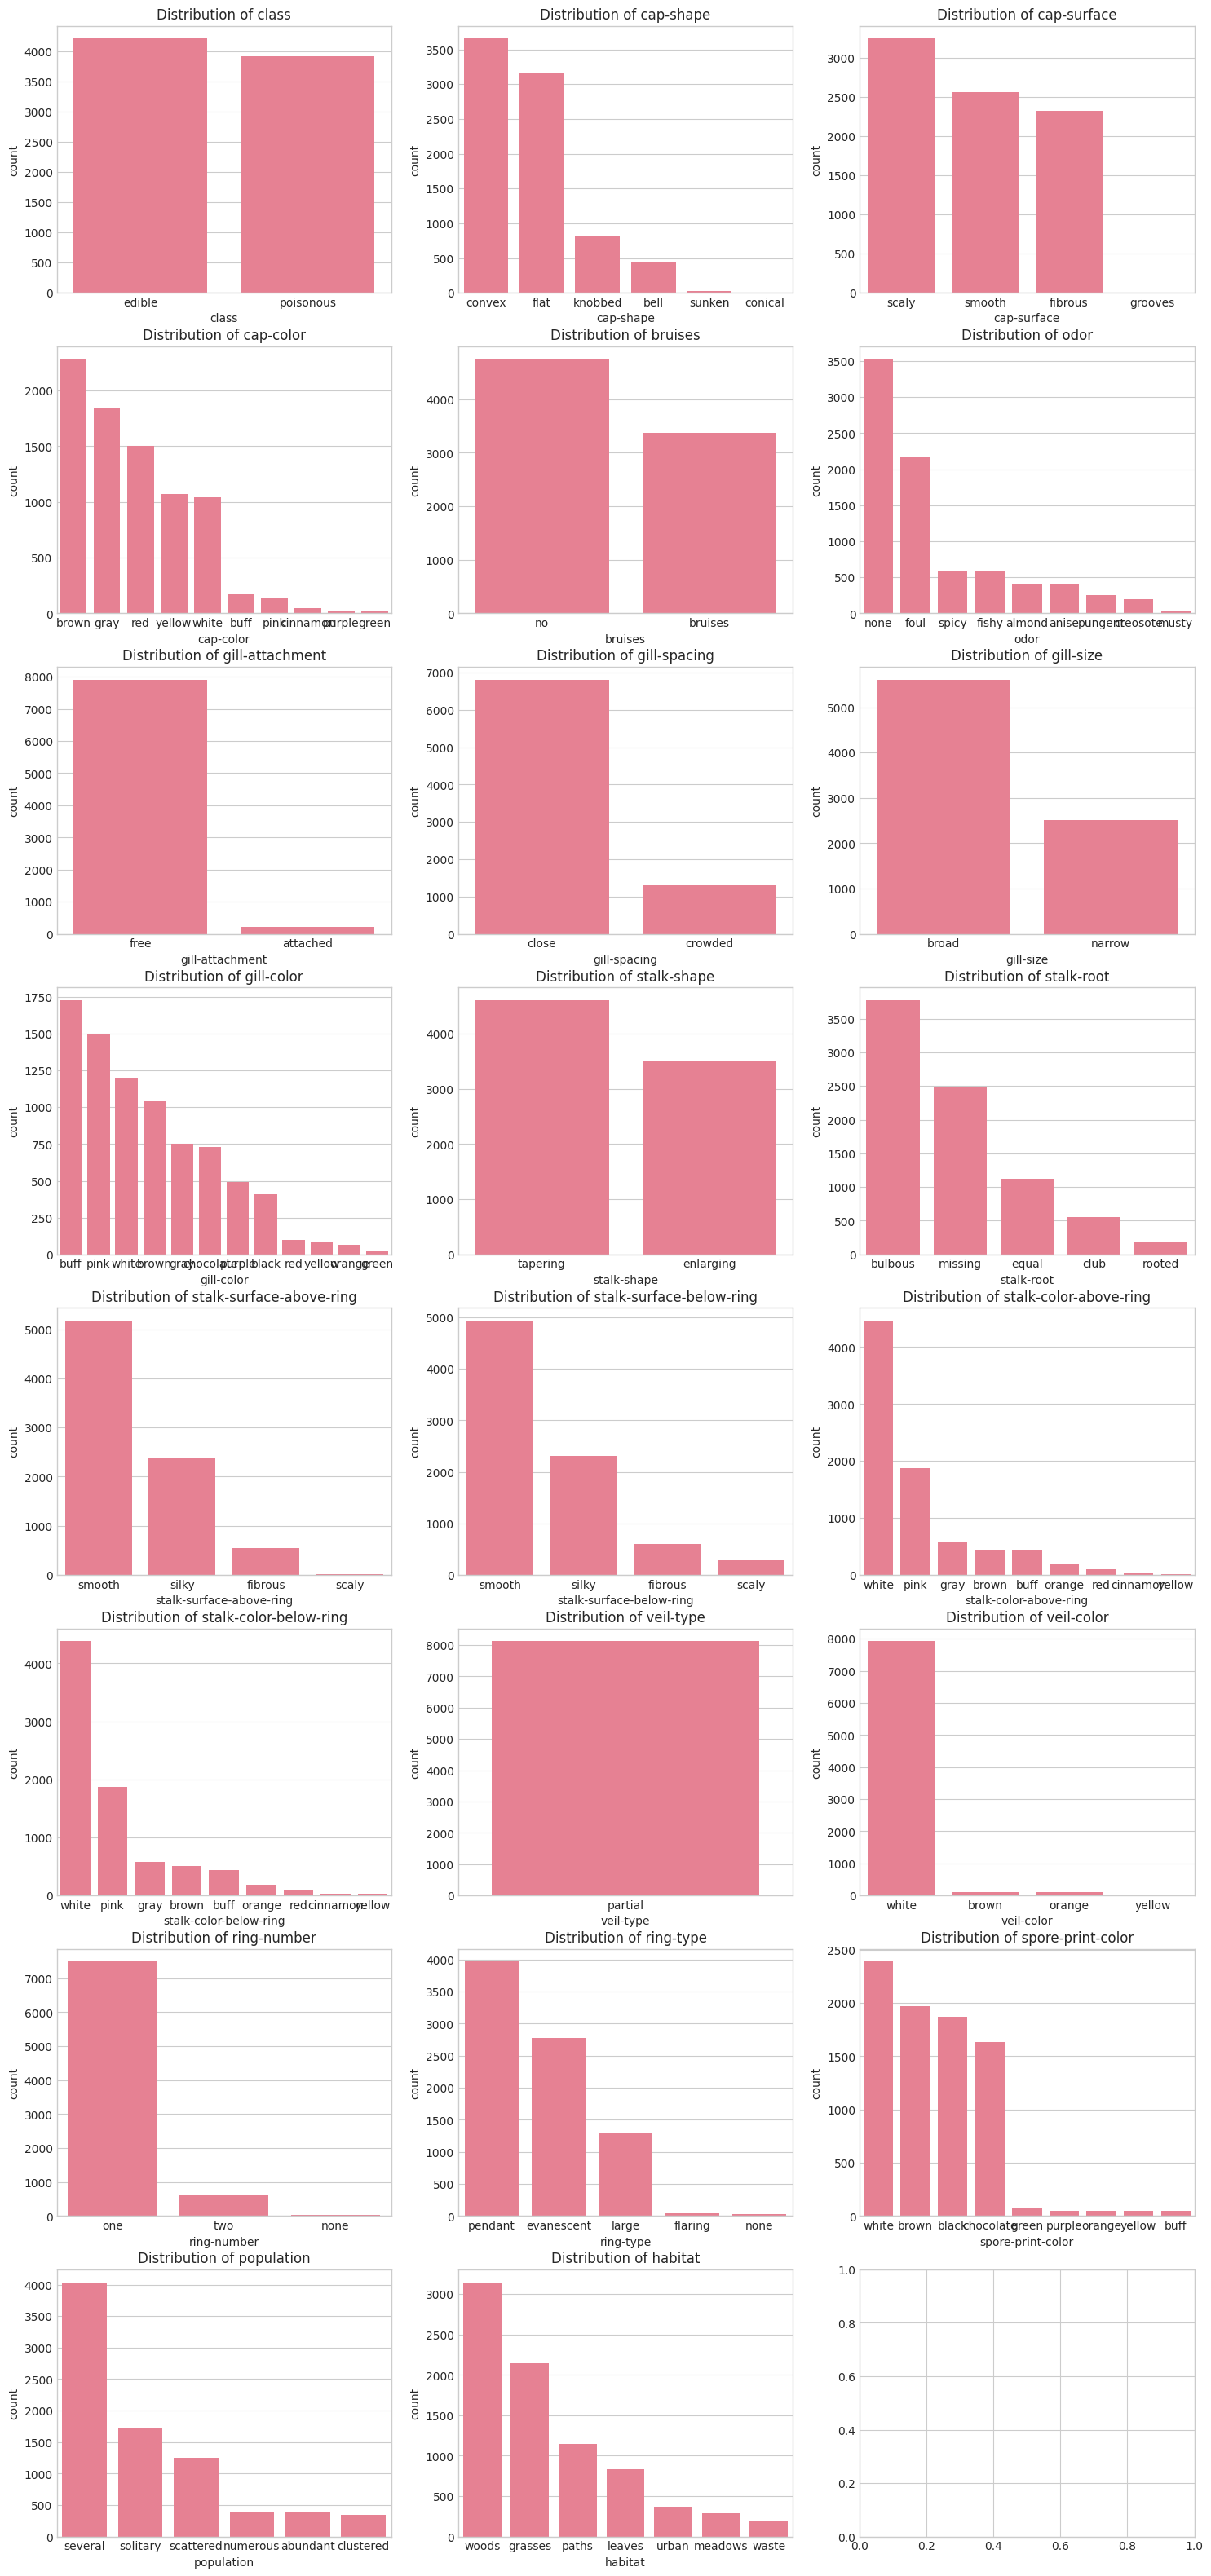

In [21]:
import math 

df = pd.read_csv(RawDataPath)
df = map_char_2_name(df)

cols = list(df.columns)
col_num = 3
row_num = math.ceil(len(cols) / col_num)
fig, axes = plt.subplots(row_num, col_num, figsize=(18,5 * row_num))
for i, col in enumerate(cols):
    order = df[col].value_counts().index
    ax = axes[i // col_num, i % col_num]
    sns.countplot(data=df, x=col, ax=ax, order=order)
    ax.set_title(f'Distribution of {col}')

Convert Columns ['cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-attachment', 'gill-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-type', 'spore-print-color', 'population', 'habitat'] to One Hot Encoding


Convert Columns ['cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-attachment', 'gill-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-type', 'spore-print-color', 'population', 'habitat'] to One Hot Encoding


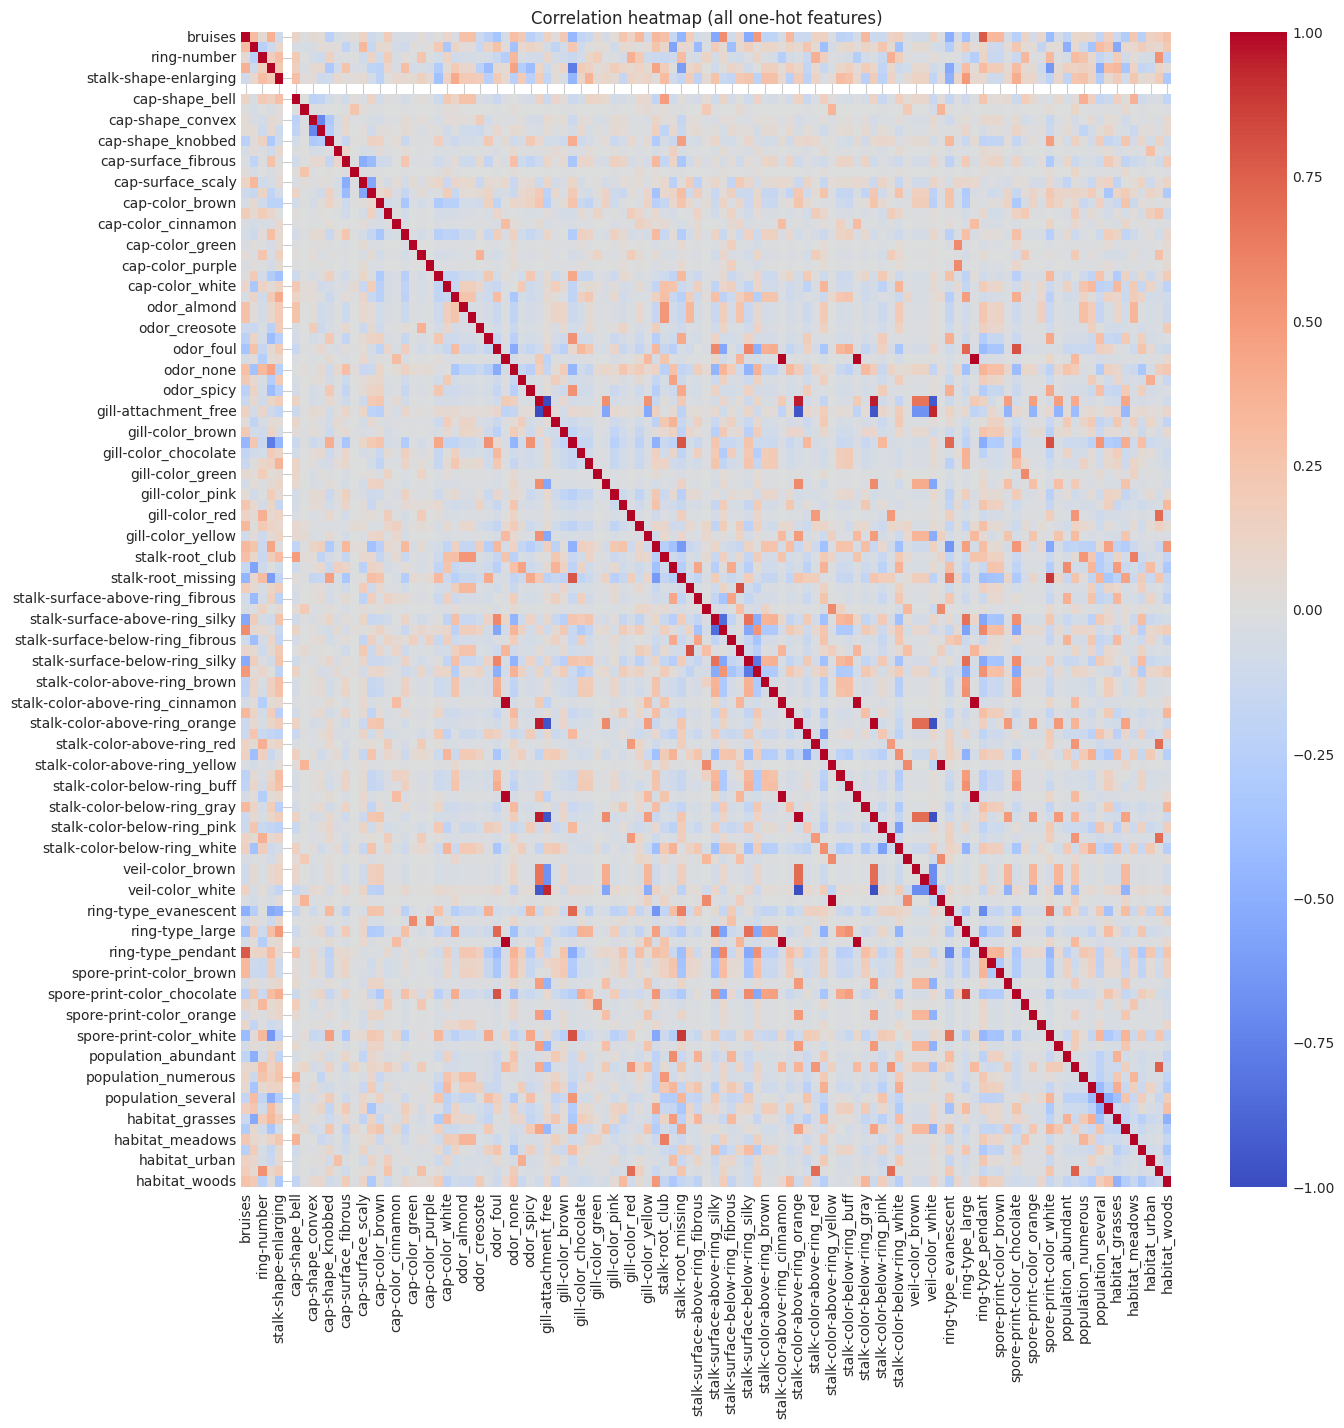

In [26]:
df = pd.read_csv(RawDataPath)
df = map_char_2_name(df)
df = convert_col_2_bool_int(df)
df = one_hot_encoding(df)

corr = df.drop("edible", axis=1).corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation heatmap (all one-hot features)')
plt.show()

In [34]:
corr.mask(np.triu(np.ones(corr.shape, dtype=bool))).stack().nlargest(10)

stalk-color-above-ring_cinnamon  odor_musty                         1.000000
stalk-color-below-ring_cinnamon  odor_musty                         1.000000
                                 stalk-color-above-ring_cinnamon    1.000000
stalk-color-below-ring_orange    stalk-color-above-ring_orange      1.000000
veil-color_yellow                stalk-color-above-ring_yellow      1.000000
ring-type_none                   odor_musty                         1.000000
                                 stalk-color-above-ring_cinnamon    1.000000
                                 stalk-color-below-ring_cinnamon    1.000000
stalk-color-above-ring_orange    gill-attachment_attached           0.955097
stalk-color-below-ring_orange    gill-attachment_attached           0.955097
veil-color_white                 gill-attachment_free               0.935238
spore-print-color_white          stalk-root_missing                 0.886541
spore-print-color_chocolate      ring-type_large                    0.868930

#### Feature Correlations ?

Although the coreelation matrix on one hot encoded columns is not benefiting a lot. But at least it tells the the columns before one hot encoded are not correlated to each other.

### Random Forest Prediction Base Line

Due to the number of columns we are dealing with, random forest would be good choice to start with.

In [39]:
df = pd.read_csv(RawDataPath)
df = map_char_2_name(df)
df = convert_col_2_bool_int(df)
df = one_hot_encoding(df)

train_df, test_df = train_test_split(df, test_size=.2)
X_train = train_df.drop('edible', axis=1)
y_train = train_df['edible'].astype(int)
X_test = test_df.drop('edible', axis=1)
y_test = test_df['edible'].astype(int)

Convert Columns ['cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-attachment', 'gill-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-type', 'spore-print-color', 'population', 'habitat'] to One Hot Encoding


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test accuracy: 1.0
Test precision: 1.0
Test recall: 1.0
Test f1: 1.0
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       781
           1       1.00      1.00      1.00       844

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



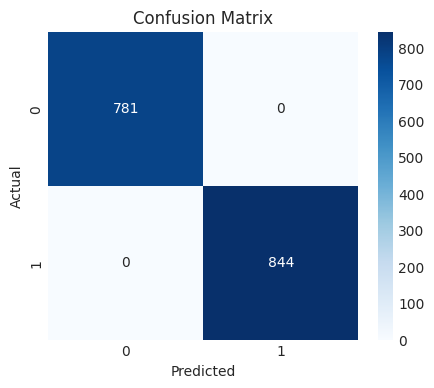

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}
rf = RandomForestClassifier(random_state=422, n_jobs=-1)
gs = GridSearchCV(rf, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)
print('Best params:', gs.best_params_)
best_rf = gs.best_estimator_

y_pred = best_rf.predict(X_test)
print('Test accuracy:', accuracy_score(y_test, y_pred))
print('Test precision:', precision_score(y_test, y_pred))
print('Test recall:', recall_score(y_test, y_pred))
print('Test f1:', f1_score(y_test, y_pred))
print('Classification report:', classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

WOW, this is suprising, Test and Validation Set both of them have 100% accuracy rate.

### K-Means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter

kmeans = KMeans(n_clusters=2, random_state=422)
kmeans.fit(X_train)
train_labels = kmeans.labels_

# Map cluster -> majority class in training set
cluster_to_label = {}
for c in np.unique(train_labels):
    mask = train_labels == c
    majority = Counter(y_train[mask]).most_common(1)[0][0]
    cluster_to_label[c] = majority
print('Cluster to label mapping (train):', cluster_to_label)

test_clusters = kmeans.predict(X_test)
y_pred = np.array([cluster_to_label[c] for c in test_clusters])

print('KMeans (k=2) Classification Report on test set:')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KMeans Confusion Matrix')
plt.show()

# Small hyperparameter search: try different init and n_init values
param_grid = {'init': ['k-means++', 'random'], 'n_init': [10, 20, 50]}

# We'll perform a simple search: fit KMeans on train for each combo, compute accuracy on test after mapping
results = []
for init in param_grid['init']:
    for n_init in param_grid['n_init']:
        km = KMeans(n_clusters=2, init=init, n_init=n_init, random_state=422)
        km.fit(X_train)
        # build mapping based on training labels
        train_l = km.labels_
        mapping = {}
        for c in np.unique(train_l):
            mapping[c] = Counter(y_train[train_l == c]).most_common(1)[0][0]
        # predict test
        preds = np.array([mapping[c] for c in km.predict(X_test)])
        acc = (preds == y_test).mean()
        results.append(((init, n_init), acc, mapping))

# Sort and print results
results = sorted(results, key=lambda x: x[1], reverse=True)

print('Best hyperparams: ', results[0][0], 'with acc=', results[0][1])    

## Agglomerative